# TGOV1 and Its Variants

The four compared cases are exactly the same, except the used ``TurbineGov``.

Note that in cases ``TGOV1DB`` and ``TGOV1NDB``, the parameters ``dbL`` and ``dbU`` are zero by default, which means that the deadband is not in effect.

In [1]:
import matplotlib.pyplot as plt

import scienceplots

import andes

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=40)

In [4]:
sv1n = andes.load('./ieee39_TGOV1N.xlsx',
                  setup=True,
                  no_output=True,
                  default_config=True)

sv1ndb = andes.load('./ieee39_TGOV1NDB.xlsx',
                    setup=True,
                    no_output=True,
                    default_config=True)

sv1 = andes.load('./ieee39_TGOV1.xlsx',
                 setup=True,
                 no_output=True,
                 default_config=True)

sv1db = andes.load('./ieee39_TGOV1DB.xlsx',
                   setup=True,
                   no_output=True,
                   default_config=True)

In [5]:
for ss in [sv1, sv1db, sv1n, sv1ndb]:
    ss.PFlow.run()
    ss.TDS.config.tf = 3.0
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True
    ss.TDS.run()

<Toggle Toggler_1>: GENROU.GENROU_3 status changed to 0 at t=1.0 sec.
<Toggle Toggler_1>: GENROU.GENROU_3 status changed to 0 at t=1.0 sec.
<Toggle Toggler_1>: GENROU.GENROU_3 status changed to 0 at t=1.0 sec.
<Toggle Toggler_1>: GENROU.GENROU_3 status changed to 0 at t=1.0 sec.


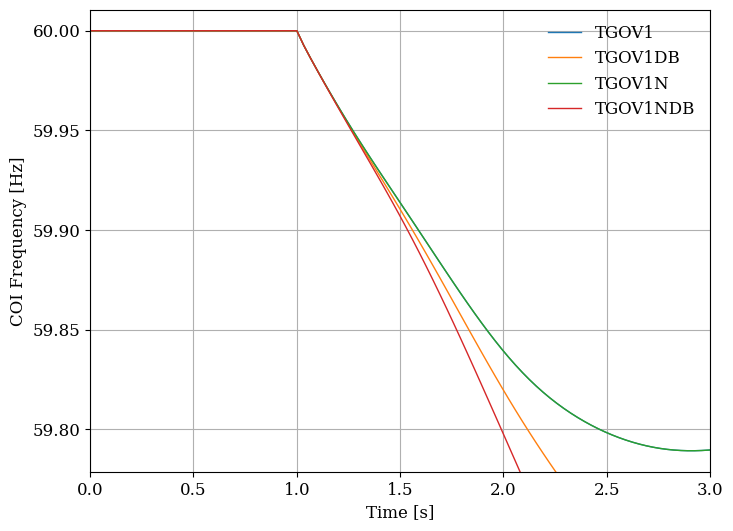

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

plt.style.use(['default', 'ieee'])

for ss, label in zip([sv1, sv1db, sv1n, sv1ndb],
                     ['TGOV1', 'TGOV1DB', 'TGOV1N', 'TGOV1NDB']):
    ss.TDS.plt.plot(ss.COI.omega,
                    yheader=[label],
                    latex=False,
                    show=False,
                    ytimes=ss.config.freq,
                    ax=ax, fig=fig)

ax.set_ylabel('COI Frequency [Hz]')
ax.grid(True)